In [1]:
!git clone https://github.com/lekshmi-j/topic-identification-nlp.git


Cloning into 'topic-identification-nlp'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 27 (delta 5), reused 21 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 34.21 MiB | 9.02 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (8/8), done.


In [2]:
%cd topic-identification-nlp



/content/topic-identification-nlp


In [3]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00


In [4]:
import pandas as pd

df = pd.read_csv("data/processed/20newsgroups_processed.csv")
df = df.dropna(subset=["clean_text"])
texts = df["clean_text"].tolist()

print(len(texts))
df.head()


236622


,clean_text,topic
0,newsgroup_rec auto_document brown edu subject ...,rec.autos.txt
1,article boeing_com fred writes cka_uxa cso_uiu...,rec.autos.txt
2,say bought saturn would paying car saving money,rec.autos.txt
3,moreover saturn really reduce margin car even ...,rec.autos.txt
4,even people buy saturn would save money force ...,rec.autos.txt


In [5]:
#Bag of words for LDA
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    max_df=0.5,
    min_df=20
)

X_bow = bow_vectorizer.fit_transform(texts)

print(X_bow.shape)


(236622, 7954)


In [6]:
#TF-IDF for NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=20
)

X_tfidf = tfidf_vectorizer.fit_transform(texts)

print(X_tfidf.shape)


(236622, 7954)


In [7]:
NUM_TOPICS = 20


In [8]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=10,
    learning_method="batch",
    random_state=42
)

lda.fit(X_bow)


LatentDirichletAllocation(n_components=20, random_state=42)

In [9]:
import numpy as np

def get_top_words(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

lda_topics = get_top_words(
    lda,
    bow_vectorizer.get_feature_names_out()
)

for i, topic in enumerate(lda_topics):
    print(f"Topic {i}: {topic}")


Topic 0: ['god', 'would', 'people', 'believe', 'one', 'say', 'christian', 'think', 'true', 'religion']
Topic 1: ['game', 'team', 'player', 'year', 'play', 'would', 'one', 'time', 'get', 'first']
Topic 2: ['file', 'program', 'use', 'line', 'get', 'window', 'code', 'copy', 'server', 'set']
Topic 3: ['armenian', 'government', 'jew', 'people', 'war', 'country', 'muslim', 'state', 'turkish', 'american']
Topic 4: ['would', 'president', 'space', 'think', 'earth', 'year', 'time', 'going', 'stephanopoulos', 'one']
Topic 5: ['com', 'writes', 'sun', 'mark', 'mike', 'dod', 'van', 'ibm', 'bill', 'netcom_com']
Topic 6: ['book', 'one', 'jesus', 'god', 'read', 'word', 'bible', 'church', 'also', 'christian']
Topic 7: ['window', 'subject', 'document', 'newsgroup_comp', 'max_max', 'graphic', 'window_misc', 'max', 'edu', 'com']
Topic 8: ['subject', 'newsgroup_rec', 'document', 'newsgroup_comp', 'hardware_document', 'edu', 'com', 'sport_hockey', 'sport_baseball', 'motorcycle_document']
Topic 9: ['car', 'on

In [10]:
from sklearn.decomposition import NMF

nmf = NMF(
    n_components=NUM_TOPICS,
    random_state=42
)

nmf.fit(X_tfidf)


/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=20, random_state=42)

In [11]:
nmf_topics = get_top_words(
    nmf,
    tfidf_vectorizer.get_feature_names_out()
)

for i, topic in enumerate(nmf_topics):
    print(f"Topic {i}: {topic}")


Topic 0: ['newsgroup_talk', 'document', 'subject', 'politics_gun', 'politics_mideast', 'politics_misc', 'religion_misc', 'atf_burn', 'dividian_ranch', 'gun']
Topic 1: ['people', 'god', 'say', 'believe', 'christian', 'jesus', 'many', 'right', 'bible', 'word']
Topic 2: ['writes', 'article_apr', 'apr', 'athos_rutgers', 'virginia_edu', 'netcom_com', 'geneva_rutgers', 'gov', 'news', 'mcgill']
Topic 3: ['hardware_document', 'newsgroup_comp', 'sys_ibm', 'subject', 'sys_mac', 'problem', 'help', 'monitor', 'mac', 'question']
Topic 4: ['com', 'ibm', 'apple', 'sun', 'world_std', 'internet', 'corp', 'access_digex', 'steve_dyer', 'sandvik_newton']
Topic 5: ['newsgroup_sci', 'subject', 'electronics_document', 'med_document', 'crypt_document', 'clipper_chip', 'code', 'good', 'clipper', 'subject_tapped']
Topic 6: ['newsgroup_rec', 'subject', 'motorcycle_document', 'auto_document', 'sport_hockey', 'sport_baseball', 'document', 'bike', 'warning_please', 'read']
Topic 7: ['window', 'newsgroup_comp', 'do'

In [12]:
lda_doc_topics = lda.transform(X_bow)
nmf_doc_topics = nmf.transform(X_tfidf)

lda_doc_topics.shape


(236622, 20)

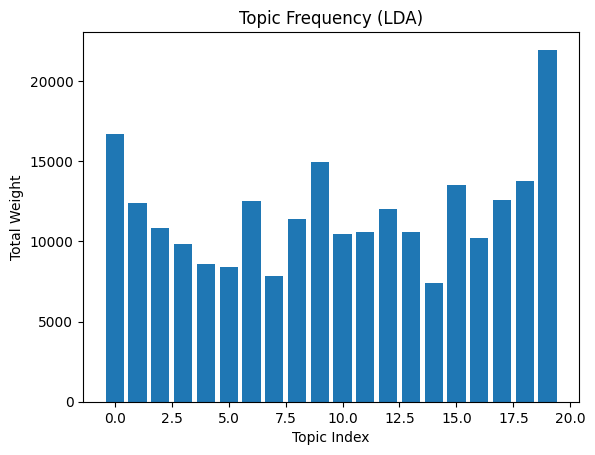

In [13]:
import matplotlib.pyplot as plt
import numpy as np

topic_strength = np.sum(lda_doc_topics, axis=0)

plt.bar(range(NUM_TOPICS), topic_strength)
plt.xlabel("Topic Index")
plt.ylabel("Total Weight")
plt.title("Topic Frequency (LDA)")
plt.show()


In [14]:
def top_docs_per_topic(doc_topic_dist, texts, topic_idx, n=3):
    top_doc_indices = doc_topic_dist[:, topic_idx].argsort()[-n:][::-1]
    return [texts[i][:300] for i in top_doc_indices]

for i in range(3):
    print(f"\n--- Topic {i} sample docs ---")
    for doc in top_docs_per_topic(lda_doc_topics, texts, i):
        print(doc)



--- Topic 0 sample docs ---
article horus_mchp sni_frank uucp_frank dwyer_writes deletion real large lot nice phrase people desk supposed see logical difference two perhaps explain difference since seem see clearly rest deleted fallacy first time pointed fallacy note people agree value ethic yet benedikt difference people triv
article horus_mchp sni_frank uucp_frank dwyer_writes deletion real large lot nice phrase people desk supposed see logical difference two perhaps explain difference since seem see clearly rest deleted fallacy first time pointed fallacy note people agree value ethic yet benedikt difference people triv
article horus_mchp sni_frank uucp_frank dwyer_writes deletion real large lot nice phrase people desk supposed see logical difference two perhaps explain difference since seem see clearly rest deleted fallacy first time pointed fallacy note people agree value ethic yet benedikt difference people triv

--- Topic 1 sample docs ---
isle picked one hell time get first win

Generative Models:
LDA assumes documents are generated from latent topic distributions, making it a probabilistic generative model.

Topic Distributions:
Each document is represented as a mixture of topics rather than belonging to a single topic.

Interpretability vs Accuracy:
NMF often produces more interpretable topics, while LDA provides a principled probabilistic framework.


In [15]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel


In [16]:
tokenized_texts = [text.split() for text in df["clean_text"]]

dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


In [17]:
def sklearn_topics_to_gensim(topics):
    return [[word for word in topic] for topic in topics]


In [18]:
lda_gensim_topics = sklearn_topics_to_gensim(lda_topics)

lda_coherence = CoherenceModel(
    topics=lda_gensim_topics,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence="c_v"
).get_coherence()

print("LDA Coherence:", lda_coherence)


LDA Coherence: 0.6019173752165787


In [19]:
nmf_gensim_topics = sklearn_topics_to_gensim(nmf_topics)

nmf_coherence = CoherenceModel(
    topics=nmf_gensim_topics,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence="c_v"
).get_coherence()

print("NMF Coherence:", nmf_coherence)


NMF Coherence: 0.53837147107147


In [20]:
def topic_diversity(topics, top_k=10):
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = topic[:top_k]
        unique_words.update(words)
        total_words += len(words)

    return len(unique_words) / total_words


In [21]:
lda_diversity = topic_diversity(lda_topics)
nmf_diversity = topic_diversity(nmf_topics)

print("LDA Topic Diversity:", lda_diversity)
print("NMF Topic Diversity:", nmf_diversity)


LDA Topic Diversity: 0.675
NMF Topic Diversity: 0.825


Model Comparison:

LDA:
- Probabilistic and generative
- Topics are broader
- Lower coherence but theoretically grounded

NMF:
- Matrix factorization based
- Topics are more interpretable
- Higher coherence and diversity

Overall, NMF produced cleaner and more interpretable topics for this dataset.


Why Accuracy Does Not Work for Topic Models:
- There is no single correct topic per document
- Topic boundaries are subjective
- Evaluation is qualitative and exploratory

Human-in-the-loop NLP:
- Humans interpret and validate topics
- Automated metrics only assist evaluation
- Domain knowledge is essential
